In [2]:
import gym
import numpy as np

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning paramters
lr = .8
y = .95
num_episodes = 2000
# Create list to contain total rewards and steps per episode
# jList = []
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    # The Q-Table learning algorithm
    while j < 99:
        j += 1
        # Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n) * (1./(i+1)))
        # Get new state and reward from environment
        s1, r, d, _ = env.step(a)
        # Update Q-Table with new knowledge
        Q[s, a] = Q[s, a] + lr*(r + y*np.max(Q[s1, :]) - Q[s, a])
        rAll += r
        s = s1
        if d == True:
            break
    # jList.append(j)
    rList.append(rAll)
        

In [6]:
print("Score over time " + str(sum(rList)/num_episodes))

Score over time 0.4725


In [7]:
print("Final Q-Table values")
print(Q)

Final Q-Table values
[[9.67569744e-02 3.00245280e-03 3.19308403e-03 4.44359430e-03]
 [3.56562441e-04 1.73659965e-03 6.85116600e-05 4.26515742e-02]
 [1.86948259e-03 2.86778423e-03 1.19173721e-03 3.30421895e-02]
 [1.92439068e-04 1.35188674e-04 5.15195182e-04 2.48570250e-02]
 [1.14904920e-01 1.05496120e-03 5.70103732e-04 1.50389144e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.09537676e-02 1.34310465e-04 9.20790578e-05 1.33028507e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.46418787e-03 1.23315037e-03 1.53192137e-03 1.54485927e-01]
 [6.78202018e-04 1.22290855e-03 2.57955214e-01 6.69167155e-04]
 [9.90414505e-02 2.03771773e-04 7.86533786e-04 9.33601967e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.23245892e-03 3.35801835e-01 1.34838286e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.42059256e-01]
 [0.00000000e+00 0.00000000e+00 0.

In [16]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
env = gym.make('FrozenLake-v0')

In [18]:
tf.reset_default_graph()

In [19]:
# These lines establish the feed=forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1, 16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

# Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [22]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
# create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        # The Q-Network
        while j < 99:
            j += 1
            # Choose an action by greedily (with e chance of random action) from the Q-network
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # Get new state and reward from environment
            s1, r, d, _ = env.step(a[0])
            # Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            # Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y*maxQ1
            # Train our network using target and predicted Q values
            _, W1 = sess.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = s1
            if d is True:
                # Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.038%


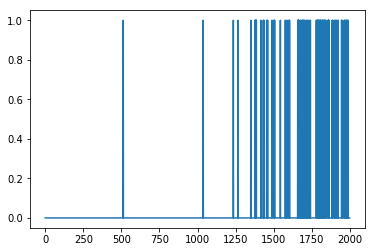

In [23]:
plt.plot(rList)


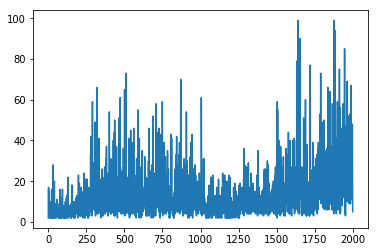

In [24]:
plt.plot(jList)